# Yandex.Afisha Business Analytics Project

* Contents <a id='back'></a>

* [Introduction](#intro)
* [General information of the datasets](#general)
* [Optimizing the data for analysis](#optimize)
* [product](#product)
    * [The number of sessions(day, week, month)](#3.1)
    * [The number of sessions per day](#3.2)
    * [Session duration](#3.3)
    * [User retention rate](#3.4)
* [Sales](#sales)
    * [When Do People Start Buying?](#4.1)
    * [How many orders do they make during a given period of time?](#4.2)
    * [What is the average purchase size?](#4.3)
    * [How much money do they bring? (LTV)](#4.4)
* [Marketing](#marketing)
    * [How much money was spent? Overall, per source and over time](#5.1)

# Introduction <a id='intro'></a>

Yandex Afisha is Russia’s largest event ticket aggregator. Cinemas, theatres, concerts, exhibitions, children’s activities and other entertainment events. This project contains 3 datasets provided by Yandex.The `visits` table (server logs with data on website visits), The `orders` table (data on orders), The `costs` table (data on marketing expenses). 
The project consists of three stages:
*    Stage 1:
    Product-
        How many people use it every day, week, and month?
        How many sessions are there per day?
        What is the length of each session?
        What's the user retention rate?
*    Stage 2:
    Sales-
        When do people start buying? 
        How many orders do they make during a given period of time?
        What is the average purchase size?
        How much money do they bring?
*    Stage 3:
    Marketing-
        How much money was spent? Overall, per source and over time.
        How much did customer acquisition from each of the sources cost?
        How worthwhile where the investments?

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
Great start with details!</div>

## General information of the datasets <a id='general'></a>

In [1]:
#Reading the data files and importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import datetime

visits = pd.read_csv('/datasets/visits_log_us.csv')
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 79.3 MB


The dataset doesn't have any missing values. Data type on columns `'End Ts'` and `'Start Ts'` will be changed to `datetime64`. The columns name needs to be changed as well. Column `'Device'` seems to be categories. in order to make our analysis easier and save some memory we will change the data type on this column to `category`.

In [2]:
orders = pd.read_csv('/datasets/orders_log_us.csv')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


`'Buy Ts'` column's data type will be changed to `datetime64`. Columns name needs to be changed.

In [3]:
expenses = pd.read_csv('/datasets/costs_us.csv')
expenses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


`'dt'` column's data type will be changed to `datetime64`.

[Back to Contents](#back)

## Optimizing the data for analysis <a id='optimize'></a>

Starting with `visits` dataframe by changing the column names and data types.

In [4]:
#Rename columns name using rename() method
visits.rename(columns={'Device': 'device', 'End Ts': 'end_ts', 'Source Id': 'source_id', 'Start Ts': 'start_ts', 'Uid': 'uid'}, inplace=True)
#change 'device' column type as 'category'
visits['device'] = visits['device'].astype('category')
#convert date columns to type 'datetime64'
visits['end_ts'] = pd.to_datetime(visits['end_ts'], format="%Y-%m-%d %H:%M:%S")
visits['start_ts'] = pd.to_datetime(visits['start_ts'], format="%Y-%m-%d %H:%M:%S")
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


`orders` dataframe

In [5]:
#Rename columns name using rename() method
orders.rename(columns={'Buy Ts': 'buy_ts', 'Revenue': 'revenue', 'Uid': 'uid'}, inplace=True)
#convert date columns to type 'datetime64'
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'], format="%Y-%m-%d %H:%M:%S")
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


`expenses` dataframe

In [6]:
expenses['dt'] = pd.to_datetime(expenses['dt'])
expenses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


# Checking for duplicates and missing values

Best way to do that is to create a function for both and run it.

In [7]:
def analyze_data(df):

    # Missing values
    print(df.isna().sum())
    print()

    # Duplicates
    print(df.duplicated().sum())
    print()

    # Random rows
    display(df.sample(10))

Check for `visits` data frame

In [8]:
analyze_data(visits)

device       0
end_ts       0
source_id    0
start_ts     0
uid          0
dtype: int64

0



,device,end_ts,source_id,start_ts,uid
186771,touch,2017-10-11 15:22:00,5,2017-10-11 15:22:00,14109555811649152639
113366,desktop,2017-10-25 15:44:00,3,2017-10-25 15:38:00,14597929929416302342
262676,desktop,2018-01-19 13:47:00,2,2018-01-19 13:44:00,13405147649137020210
40361,desktop,2017-12-21 16:55:00,4,2017-12-21 16:53:00,17740345065919062880
220331,desktop,2017-06-27 12:01:00,5,2017-06-27 12:00:00,12298823764006649360
287391,desktop,2017-11-26 13:34:00,4,2017-11-26 13:28:00,12269443652484170937
355395,touch,2018-03-22 17:53:00,5,2018-03-22 17:46:00,3975445135850650877
152897,desktop,2017-11-28 16:36:00,3,2017-11-28 16:19:00,13505400694202669464
291785,touch,2017-09-19 10:58:00,2,2017-09-19 10:56:00,16383735996963781198
299226,desktop,2018-05-05 21:10:00,4,2018-05-05 21:04:00,10529069442105441223


Check for `orders` data frame

In [9]:
analyze_data(orders)

buy_ts     0
revenue    0
uid        0
dtype: int64

0



,buy_ts,revenue,uid
15608,2017-11-01 09:18:00,2.81,11430692592460139839
27822,2018-01-03 12:11:00,0.85,14607265834880329815
34312,2018-02-12 13:04:00,3.67,16031176660553695762
1247,2017-06-10 21:47:00,2.44,3574708633232326896
6551,2017-09-01 11:34:00,2.44,11010938668909185960
20740,2017-11-28 16:55:00,0.49,2880121956756498230
50062,2018-05-31 11:58:00,1.83,4535629926036684705
38550,2018-03-06 18:30:00,4.67,6321595941486066911
21847,2017-12-04 13:54:00,5.19,8958893961849032365
7060,2017-09-07 09:09:00,7.94,2561437337391860181


Check for `expenses` data frame

In [10]:
analyze_data(expenses)

source_id    0
dt           0
costs        0
dtype: int64

0



,source_id,dt,costs
197,1,2017-12-15,89.68
1685,5,2018-01-20,171.87
2525,10,2018-05-15,14.07
1128,4,2017-07-10,59.37
259,1,2018-02-15,129.46
392,2,2017-06-30,87.67
1252,4,2017-11-11,318.96
1748,5,2018-03-24,155.64
576,2,2017-12-31,91.05
1497,5,2017-07-16,96.74


The data frames have no missing or duplicated values.

## Product <a id='product'></a>

### The number of users(day, week, month) <a id='3.1'></a>

In [11]:
# extracting the month and week from 'start_ts' column
visits['date']  = visits['start_ts'].values.astype('datetime64[D]')
visits['week']  = visits['start_ts'].values.astype('datetime64[W]')
visits['month'] = visits['start_ts'].values.astype('datetime64[M]')
# calculate the DAU, WAU and MAU
dau_avg = visits.groupby(visits['date']).agg({'uid':'nunique'}).mean().astype('int')
wau_avg = visits.groupby(visits['week']).agg({'uid':'nunique'}).mean().astype('int')
mau_avg = visits.groupby(visits['month']).agg({'uid':'nunique'}).mean().astype('int')
print('Avarage number of daily users is', dau_avg['uid'])

orders['week']  = pd.to_datetime(orders['buy_ts']).values.astype('datetime64[W]')
orders['month'] = orders['buy_ts'].values.astype('datetime64[M]')

Avarage number of daily users is 907


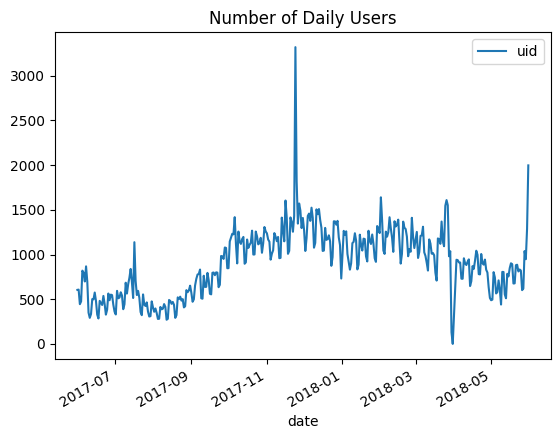

In [12]:
dau=visits.groupby(visits['date'])['uid'].nunique().reset_index()
dau.plot(x='date', y='uid',title='Number of Daily Users')
plt.show()

* Conclusions: Here we can see the rise and fall of daily unique users. The number was growing higher from mid-2017 to late 2017 but then started to falter. Overall There seems to be decline since it's peak in December 2017. That dramatic drop can perhaps be explained by a server crash or scheduled maintenance.

In [13]:
print('Avarage number of weekly users is', dau_avg['uid'])

Avarage number of weekly users is 907


In [14]:
print('Avarage number of weekly users is', wau_avg['uid'])

Avarage number of weekly users is 5724


In [15]:
dau_avg/wau_avg

uid    0.158456
dtype: float64

* `Weekly stickiness of 15.88% means the users return 1 out of 7 days in a week.`

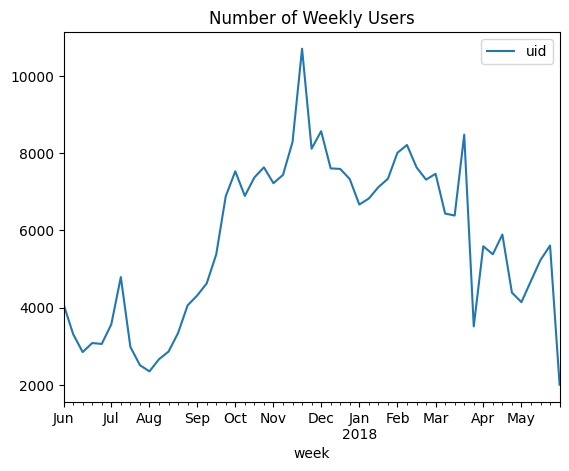

In [16]:
dau=visits.groupby(visits['week'])['uid'].nunique().reset_index()
dau.plot(x='week', y='uid', title='Number of Weekly Users')
plt.show()

* Conclusions: Here we see a similar story to the daily users in overall trend. We had steady increase through the end of 2017, but then gradual decrease through 2018.

In [17]:
print('Avarage number of monthly users is', mau_avg['uid'])

Avarage number of monthly users is 23228


In [18]:
dau_avg/mau_avg

uid    0.039048
dtype: float64

* `Monthly stickiness of 3.91% means the users return 1 out of 30 days in a month`

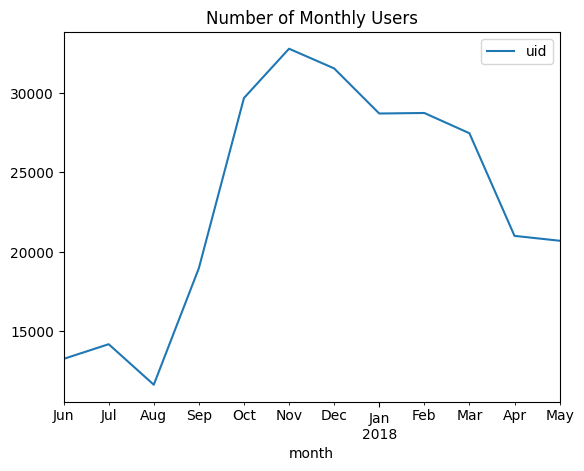

In [19]:
dau=visits.groupby(visits['month'])['uid'].nunique().reset_index()
dau.plot(x='month', y='uid',title='Number of Monthly Users')
plt.show()

* Conclusions: The monthly graph shows a much more dramatic view of the global trend, rise through 2017 and fall through 2018.

# Conclusion
* It's quite common for people only look for an entertainment ticket once a week or once a month.
* However, boosting user engagement is advisable since It will increase the possibility of users making an order.

[Back to Contents](#back)

### The number of sessions per day <a id='3.2'></a>

In [20]:
# calculate session per user
session_per_user = visits.groupby('date').agg({'uid': ['count', 'nunique']}).reset_index()
session_per_user.columns = ['date','n_sessions', 'n_users']
session_per_user['session_per_user'] = session_per_user['n_sessions']/session_per_user['n_users']
print('Average sessions per day:',session_per_user['session_per_user'].mean())
print('Median sessions per day:',session_per_user['session_per_user'].median())

Average sessions per day: 1.082169644003972
Median sessions per day: 1.0824875552419868


In [21]:
session_per_user

,date,n_sessions,n_users,session_per_user
0,2017-06-01,664,605,1.097521
1,2017-06-02,658,608,1.082237
2,2017-06-03,477,445,1.071910
3,2017-06-04,510,476,1.071429
4,2017-06-05,893,820,1.089024
...,...,...,...,...
359,2018-05-27,672,620,1.083871
360,2018-05-28,1156,1039,1.112608
361,2018-05-29,1035,948,1.091772
362,2018-05-30,1410,1289,1.093871


On average, each user spends 1 session on the platform per day. We can't say it's used very frequently.

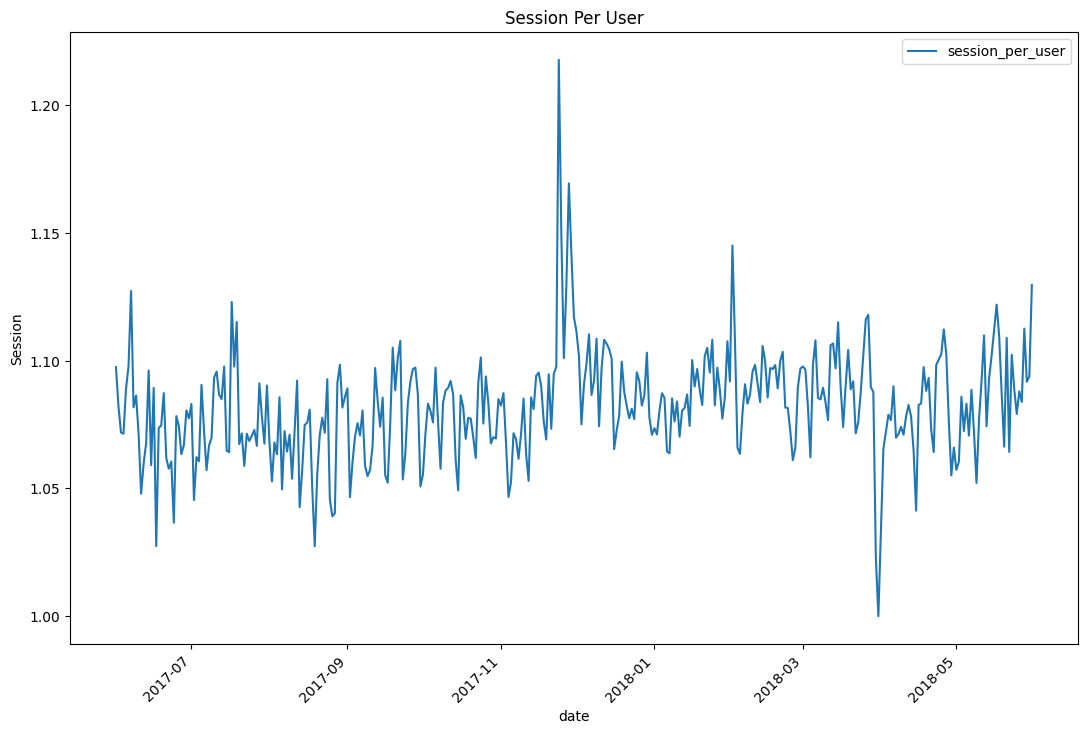

In [22]:
session_per_user.plot(kind='line', x='date', y='session_per_user', rot=45, figsize=(13, 9), title='Session Per User', ylabel='Session')
plt.show()

Conclusions: Between the average and medians, you can see that sessions per day doesn't really deviate from 1.

### Session duration <a id='3.3'></a>

The distribution is too unstable. We will use mode() method to see the most frequent values.

In [23]:
# calculate session duration
visits['session_duration_min'] = (visits['end_ts'] - visits['start_ts'])/ pd.Timedelta(minutes=1)

In [24]:
visits['session_duration_min'].describe()

count    359400.000000
mean         10.717095
std          16.618796
min         -46.000000
25%           2.000000
50%           5.000000
75%          14.000000
max         711.000000
Name: session_duration_min, dtype: float64

The maximum number for session duration seems unrealistic. We will check these lines and find the issue.

In [25]:
visits[visits['end_ts'] < visits['start_ts']]

,device,end_ts,source_id,start_ts,uid,date,week,month,session_duration_min
4181,desktop,2018-03-25 03:18:00,3,2018-03-25 03:50:00,13092152539246794986,2018-03-25,2018-03-22,2018-03-01,-32.0
177972,desktop,2018-03-25 03:09:00,9,2018-03-25 03:55:00,4621202742905035453,2018-03-25,2018-03-22,2018-03-01,-46.0


Seems like we have 2 row that contains wrong data. Since the `end_ts` is earlier than `start_ts` we went back to 86400 seconds a day and extracted the duration time from this number (86400 - 1920 = 84480). Let's remove these rows from the dataset.

In [26]:
#drop the rows with wrong data using 'drop' method
visits.drop(4181, axis=0, inplace=True)
visits.drop(177972, axis=0, inplace=True)

We check the data frame to see if there are any other rows with wrong data.

In [27]:
visits[visits['end_ts'] < visits['start_ts']]

,device,end_ts,source_id,start_ts,uid,date,week,month,session_duration_min


The data frame is cleared from wrong data. Now let's have a look at the mean, max and min values.

In [28]:
visits['session_duration_min'].describe()

count    359398.000000
mean         10.717371
std          16.618420
min           0.000000
25%           2.000000
50%           5.000000
75%          14.000000
max         711.000000
Name: session_duration_min, dtype: float64

<AxesSubplot:>

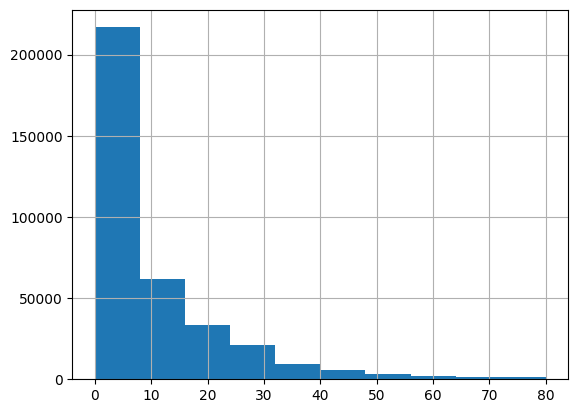

In [29]:
# we will take a look at the distribution
visits['session_duration_min'].hist(range=[0,80])

About 70% of the sessions are under 14 minutes.

In [30]:
#New dataframe to calculate the average session length by days
session_length= visits.groupby('date')['session_duration_min'].mean().reset_index()
session_length

,date,session_duration_min
0,2017-06-01,11.105346
1,2017-06-02,10.330674
2,2017-06-03,10.115968
3,2017-06-04,9.238497
4,2017-06-05,10.407503
...,...,...
359,2018-05-27,9.282738
360,2018-05-28,10.546987
361,2018-05-29,10.490467
362,2018-05-30,10.678463


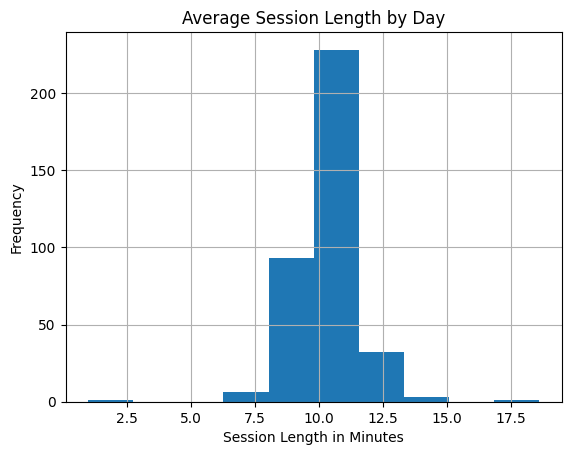

In [31]:
session_length['session_duration_min'].hist()
plt.xlabel('Session Length in Minutes')
plt.ylabel('Frequency')
plt.title('Average Session Length by Day')
plt.show()

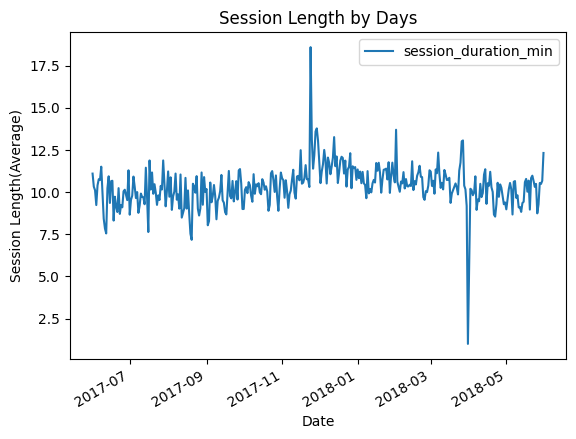

In [32]:
#session_length['date'] = session_length['date'].values.astype('datetime64[D]')
session_length.plot(kind='line', x='date', y='session_duration_min', xlabel='Date', ylabel='Session Length(Average)', title='Session Length by Days')
plt.show()

In [33]:
visits['session_duration_min'].value_counts(normalize=True, ascending=False)[:5]

1.0    0.147550
0.0    0.099594
2.0    0.099466
3.0    0.074213
4.0    0.058668
5.0    0.047315
Name: session_duration_min, dtype: float64

In [34]:
visits['session_duration_min'].mode()

0    1.0
dtype: float64

* Almost 15% of users visit for about 60 seconds, followed by 0sec(10%), 120sec(10%), 180sec(7.4%), 240sec(6%).
* The mean(643s) and median(300s) are much larger than the mode (60s). It indicates a right-skewed distribution, with most data clustered towards the former.
* Keep in mind that YandexAfisha is a ticket-selling platform, 60 seconds would be quiet enough to buy a ticket. However, There is room for improvement on longer session durations.
* Sources with shorter session durations may drive less qualified traffic or use misleading ads that don’t match user expectations.
* Mobile Users Drop Off Sooner. Smaller screens, potential UI/UX challenges, and slower load times may frustrate users.
* Recommendations: Enhance site navigation, offer more engaging content, or introduce interactive elements to increase session time.

# Conclusions:

* The average session duration stands at ~10 minutes and 43 seconds.
* Users are somewhat engaged but there’s room to improve session depth and interaction.
* Despite some strong sources, average session durations suggest users might not be fully exploring the platform.
#  Recommendations:
* Introduce personalized product recommendations or interactive elements.
* Utilize pop-ups or chatbots to guide users to deeper site sections.
* Implement gamification or loyalty features to encourage longer sessions.

### User retention rate <a id='3.4'></a>

<AxesSubplot:title={'center':'Cohorts: User Retention'}, xlabel='cohort_lifetime', ylabel='first_activity_month'>

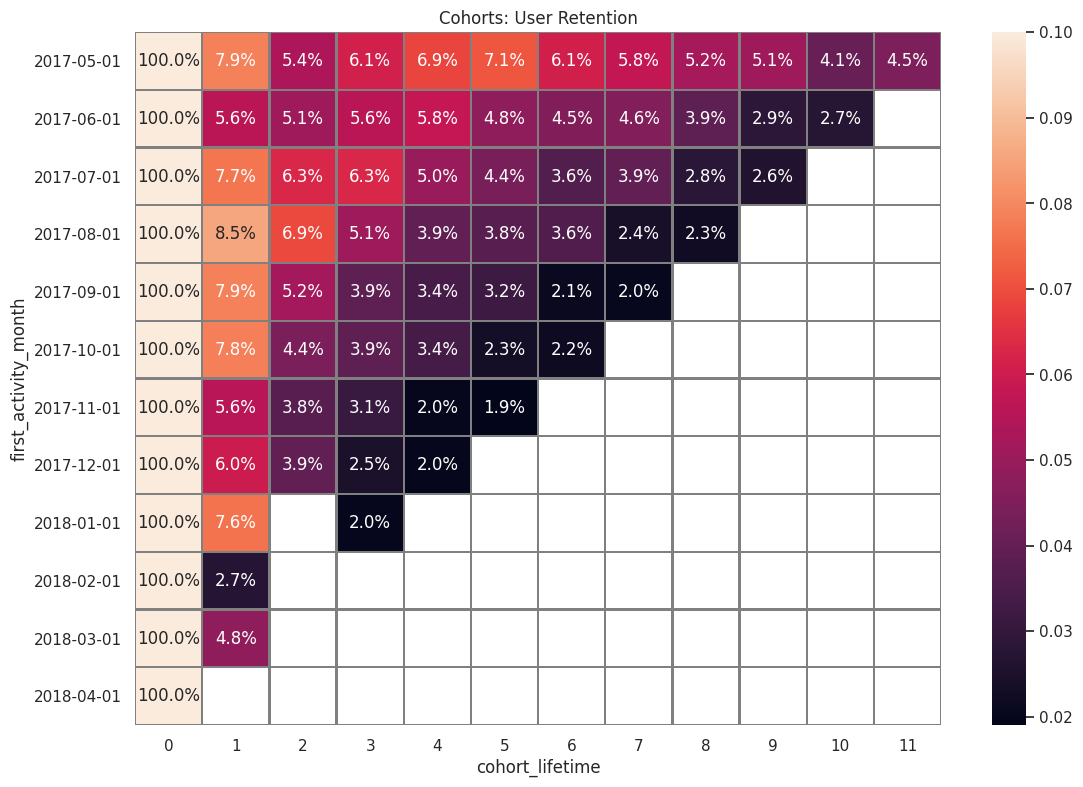

In [35]:
visits['date'] = pd.to_datetime(visits['date'])
# creat new 'activiy_month' and 'first_activity_week' columns
first_activity_date = visits.groupby('uid')['date'].min()
first_activity_date.name = 'first_activity_date'
visits = visits.join(first_activity_date, on='uid', how='left', lsuffix='_left')
# creat 'first_activity_month' column
visits['first_activity_month'] = (pd.to_datetime(visits['first_activity_date'], unit='d') - 
pd.to_timedelta(visits['first_activity_date'].dt.day, unit='d')).astype('datetime64[M]')
# creat 'activity_month' column
visits['activity_month'] = (pd.to_datetime(visits['date'], unit='d') - 
pd.to_timedelta(visits['date'].dt.day, unit='d')).astype('datetime64[M]')
# calculate cohort lifetime
visits['cohort_lifetime'] = visits['activity_month'] - visits['first_activity_month']
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(30, 'D')
visits['cohort_lifetime'] = visits['cohort_lifetime'].astype('int')
cohorts = visits.groupby(['first_activity_month', 'cohort_lifetime']).agg({'uid': 'nunique'}).reset_index()
# calculate initial users
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month', 'uid']]
initial_users_count = initial_users_count.rename(columns={'uid': 'cohort_users'})
cohorts = cohorts.merge(initial_users_count, on='first_activity_month')
# calculate retention rate
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users']
retention_pivot = cohorts.pivot_table(
    index='first_activity_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum'
)
retention_pivot.index=retention_pivot.index.astype(str)
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(
    retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmax=0.1
)

The retention rate is decreasing for each new cohort month. The users that started a session are most likely stop using the platfotrm. Whereas the retention rate for each new cohort is unstable. Retention drops significantly after the 1st month across all cohorts, often to ~3-8% in Month 2. Sep and May 2017 cohort had the highest Month 2 retention at 7.9%. May 2017 cohort showed the best long-term retention, maintaining ~4.1-7.9% up to Month 12.

[Back to Contents](#back)

## Sales <a id='sales'></a>

### When Do People Start Buying? <a id='4.1'></a>

In [36]:
# calculate the difference between registration and conversion
# creat new first_purchase dataframe
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
first_purchase = orders.groupby('uid')['buy_ts'].min().reset_index()
first_purchase.columns = ['uid', 'first_purchase_date']
# extract day, week and month
first_purchase['first_order_dt'] = first_purchase['first_purchase_date'].dt.date
first_purchase['first_order_week'] = first_purchase['first_purchase_date'].astype('datetime64[W]')
first_purchase['first_order_month'] = first_purchase['first_purchase_date'].astype('datetime64[M]')
first_purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36523 entries, 0 to 36522
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   uid                  36523 non-null  uint64        
 1   first_purchase_date  36523 non-null  datetime64[ns]
 2   first_order_dt       36523 non-null  object        
 3   first_order_week     36523 non-null  datetime64[ns]
 4   first_order_month    36523 non-null  datetime64[ns]
dtypes: datetime64[ns](3), object(1), uint64(1)
memory usage: 1.4+ MB


In [37]:
# do the same on visits dataframe
first_visit = visits.groupby('uid')['start_ts'].min().reset_index()
first_visit['first_session_date'] = first_visit['start_ts'].dt.date
first_visit['first_session_week'] = first_visit['start_ts'].astype('datetime64[W]')
first_visit['first_session_month'] = first_visit['start_ts'].astype('datetime64[M]')
first_visit.head()

,uid,start_ts,first_session_date,first_session_week,first_session_month
0,11863502262781,2018-03-01 17:27:00,2018-03-01,2018-03-01,2018-03-01
1,49537067089222,2018-02-06 15:55:00,2018-02-06,2018-02-01,2018-02-01
2,297729379853735,2017-06-07 18:47:00,2017-06-07,2017-06-01,2017-06-01
3,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-14,2017-09-01
4,325320750514679,2017-09-30 14:29:00,2017-09-30,2017-09-28,2017-09-01


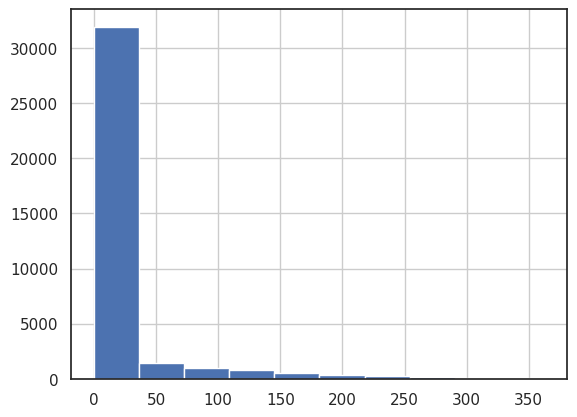

In [38]:
conversion = pd.merge(first_visit, first_purchase, on='uid')
conversion['days_of_first_purchase'] = ((conversion['first_order_dt'] - conversion['first_session_date'])/np.timedelta64(1, 'D')).astype('int')
conversion['days_of_first_purchase'].hist()
plt.show()

Users usually place they order at the seme day they register to the platform.

[Back to Contents](#back)

###  How many orders do they make during a given period of time?  <a id='4.2'></a>

In [39]:
order=first_purchase.merge(orders, on='uid')
# create order_month column

orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
# calculate cohort size
cohort_size = first_purchase.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_size.rename(columns={'uid': 'cohort_size'}, inplace=True)

cohort = order.groupby(['first_order_month', 'month'])['revenue'].count().reset_index()
cohorts = cohort_size.merge(cohort, on='first_order_month')
# create cohort dataframe for analysis
cohorts.rename(columns={'revenue':'orders'}, inplace=True)
cohorts

,first_order_month,cohort_size,month,orders
0,2017-06-01,2023,2017-06-01,2354
1,2017-06-01,2023,2017-07-01,177
2,2017-06-01,2023,2017-08-01,174
3,2017-06-01,2023,2017-09-01,226
4,2017-06-01,2023,2017-10-01,292
...,...,...,...,...
74,2018-03-01,3533,2018-05-01,176
75,2018-04-01,2276,2018-04-01,2495
76,2018-04-01,2276,2018-05-01,195
77,2018-05-01,2988,2018-05-01,3249


In [40]:
# calculate the age of cohorts
cohorts['age'] = ((cohorts['month'] - cohorts['first_order_month'])/np.timedelta64(1, 'M')).round()
cohorts['order_per_buyer'] = cohorts['orders']/cohorts['cohort_size']
cohorts.columns = ['first_order_month', 'cohort_size', 'month', 'orders', 'age_month', 'order_per_buyer']
cohorts.head()

,first_order_month,cohort_size,month,orders,age_month,order_per_buyer
0,2017-06-01,2023,2017-06-01,2354,0.0,1.163618
1,2017-06-01,2023,2017-07-01,177,1.0,0.087494
2,2017-06-01,2023,2017-08-01,174,2.0,0.086011
3,2017-06-01,2023,2017-09-01,226,3.0,0.111715
4,2017-06-01,2023,2017-10-01,292,4.0,0.144340


<AxesSubplot:title={'center':'Purchases Per User'}, xlabel='age_month', ylabel='first_order_month'>

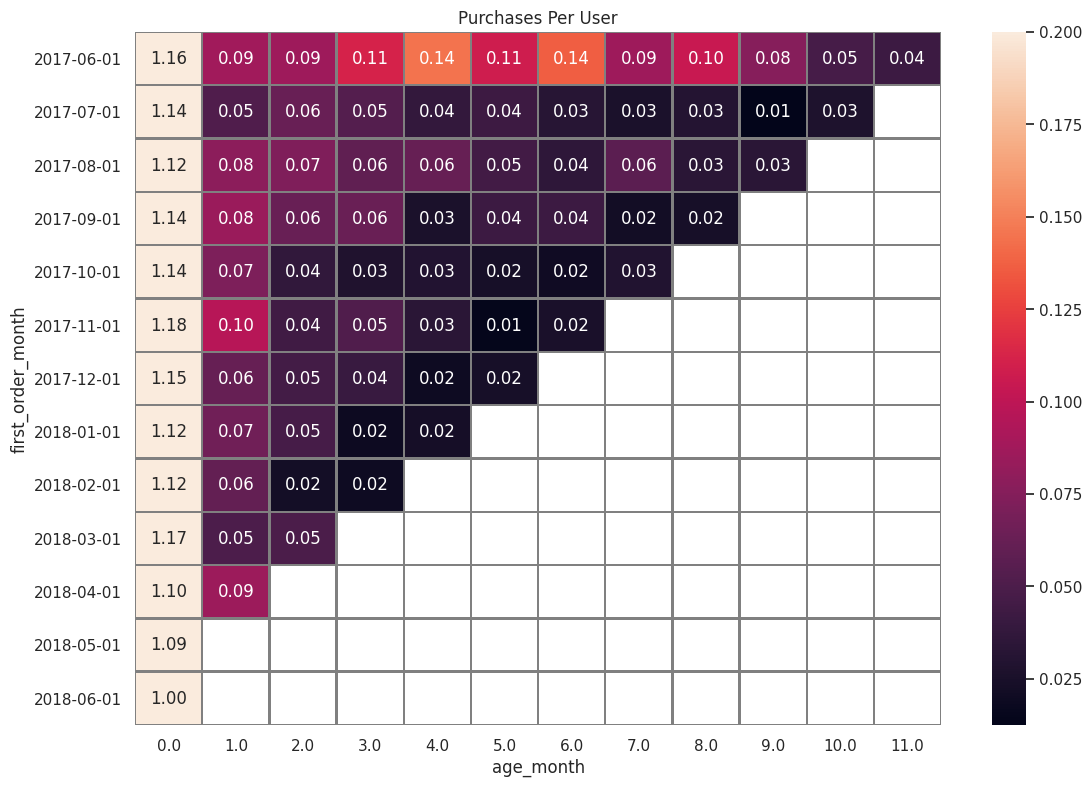

In [41]:
# create pivot table
cohort_pivot = cohorts.pivot_table(
index='first_order_month',
columns='age_month',
values='order_per_buyer',
aggfunc='sum'
)
cohort_pivot.index=cohort_pivot.index.astype(str)
cohort_pivot.fillna('')
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Purchases Per User')
sns.heatmap(
    cohort_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='gray', vmax=0.2
)

<AxesSubplot:title={'center':'Cumulative Purchases Per User'}, xlabel='age_month', ylabel='first_order_month'>

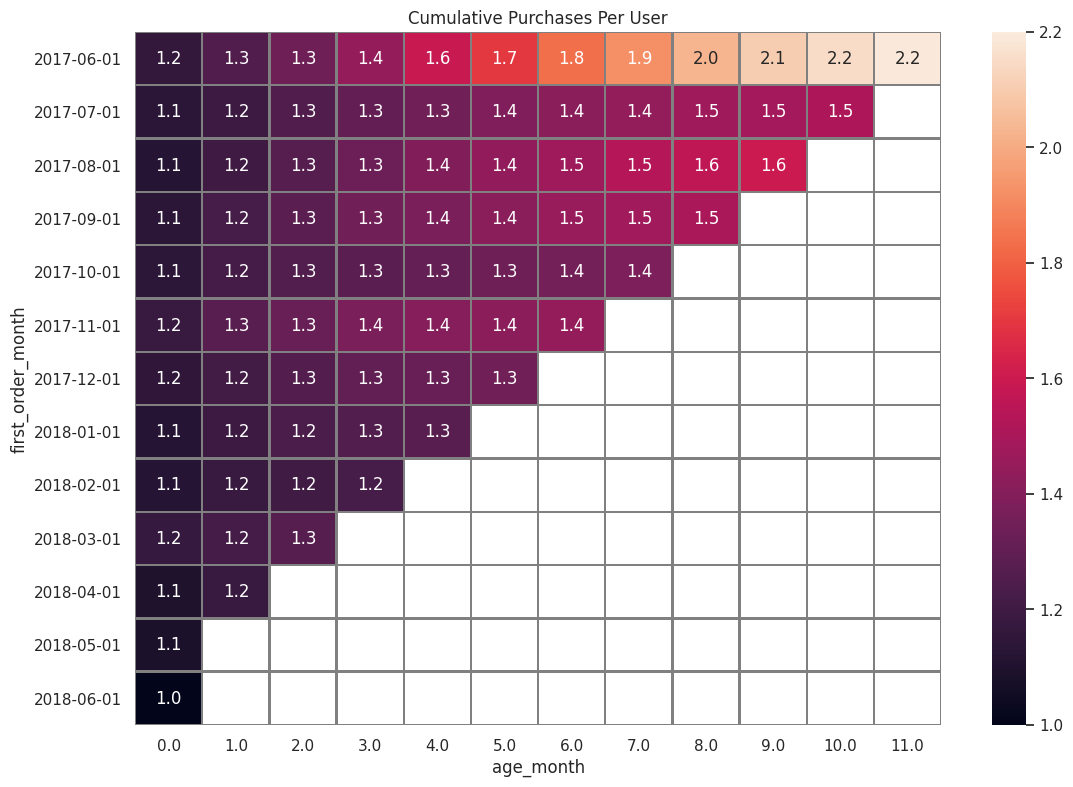

In [42]:
cohort_pivot = cohorts.pivot_table(
index='first_order_month',
columns='age_month',
values='order_per_buyer',
aggfunc='sum'
).cumsum(axis=1)
cohort_pivot.index=cohort_pivot.index.astype(str)
cohort_pivot.fillna('')
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cumulative Purchases Per User')
sns.heatmap(
    cohort_pivot, annot=True, fmt='.1f', linewidths=1, linecolor='gray', vmax=2.2
)

Customers made an average of 1.16 to 1.27 orders per month throughout the analyzed period, indicating that most users placed only one order monthly, with a small fraction making repeat purchases.

###  What is the average purchase size?  <a id='4.3'></a>

In [43]:
orders.describe()

,revenue,uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


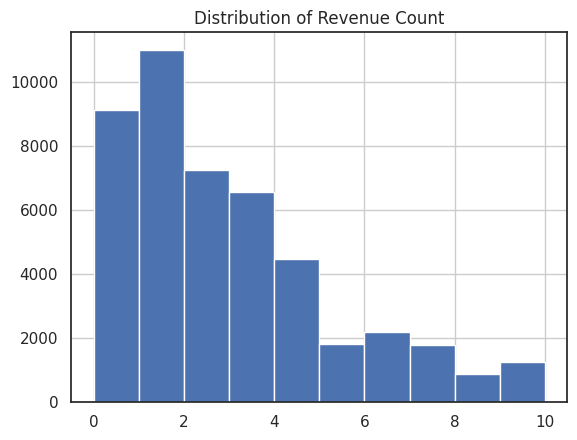

In [44]:
#visualizing `revenue` column from orders data frame
orders['revenue'].hist(range=[0, 10])
plt.title('Distribution of Revenue Count')
plt.show()

The chart shows us that most of the purchases are up to `5$`. Since `YandexAfisha` is a ticket selling platform it makes sense that most of the tickets are sold up to `5$`.

<AxesSubplot:xlabel='age_month', ylabel='first_order_month'>

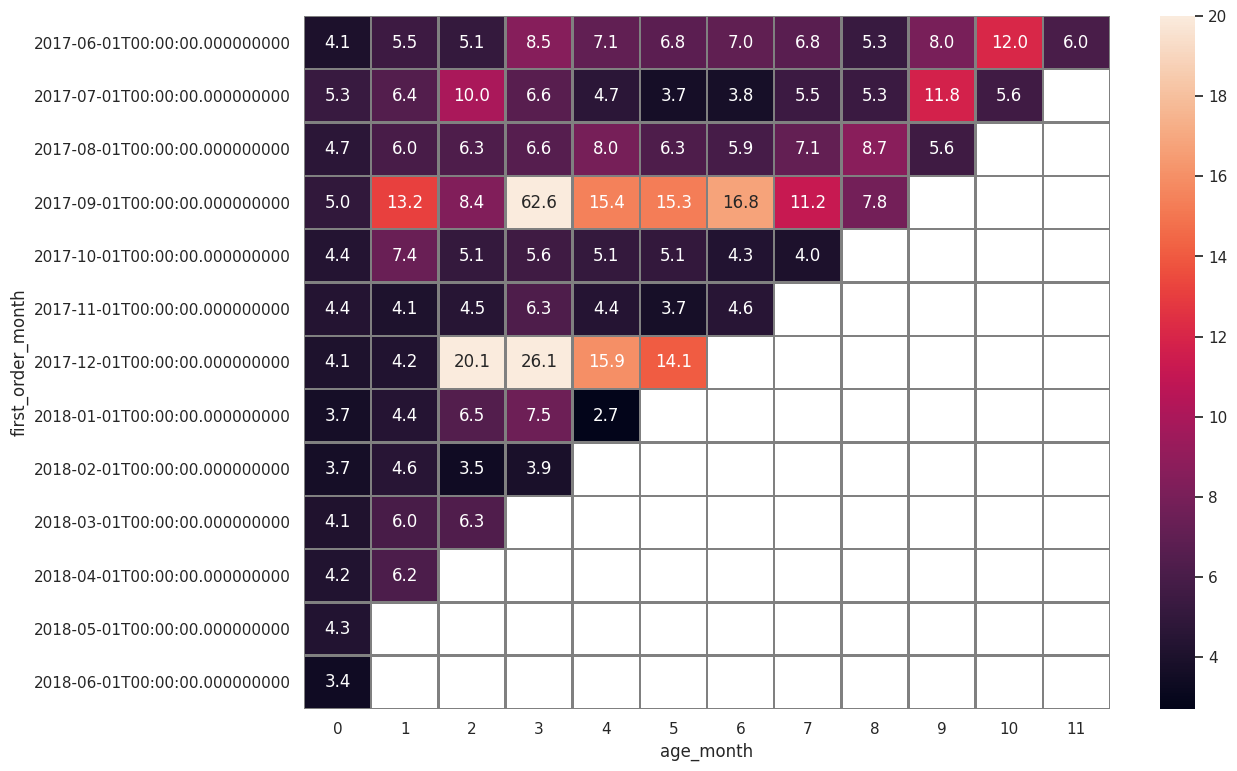

In [45]:
avg_cohort=order.groupby(['first_order_month','month'])['revenue'].mean().reset_index()
avg_cohort['age_month'] = (avg_cohort['month'].dt.to_period('M') - avg_cohort['first_order_month'].dt.to_period('M')).apply(lambda x: x.n)
avg_cohort['first_order_month'].astype('datetime64[M]')
avg_cohort_pivot=avg_cohort.pivot_table(
index='first_order_month', 
columns='age_month', 
values='revenue', 
aggfunc='mean'
)
avg_cohort.index=avg_cohort.index.astype(str)
avg_cohort_pivot.round(2).fillna('')
plt.figure(figsize=(13, 9))
sns.heatmap(
    avg_cohort_pivot, annot=True, fmt='.1f', linewidths=1, linecolor='gray', vmax=20
)

The analysis reveals that the average purchase size is $5.00. This indicates relatively small, frequent transactions, suggesting that customers might be making low-value purchases regularly. Businesses could explore strategies like product bundling, volume discounts, or targeted upselling to encourage larger order sizes and boost overall revenue.

<AxesSubplot:title={'center':'Distribution of Revenue by Month'}, xlabel='month', ylabel='Revenue($)'>

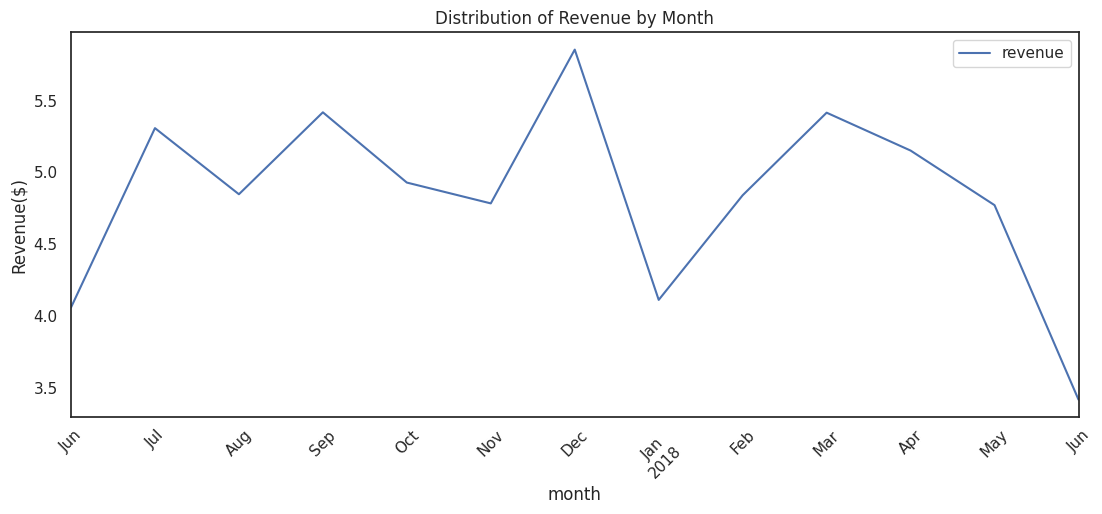

In [46]:
avg_check_m=orders.groupby(['month'])['revenue'].mean().reset_index()
avg_check_m.plot(kind='line', x='month', ylabel='Revenue($)', title='Distribution of Revenue by Month',rot=45, figsize=(13,5))

The average revenue per order fluctuated between 4.06 and 5.85 across the analyzed period. December 2017 recorded the highest average at $5.85, aligning with increased holiday spending.

In [47]:
avg_check_m

,month,revenue
0,2017-06-01,4.060106
1,2017-07-01,5.306589
2,2017-08-01,4.847139
3,2017-09-01,5.416448
4,2017-10-01,4.928280
5,2017-11-01,4.783518
6,2017-12-01,5.852139
7,2018-01-01,4.112927
8,2018-02-01,4.840095
9,2018-03-01,5.413930


# Conclusion:
The analysis reveals an overall average purchase size of 5.00, indicating consistent customer spending per transaction. When examining the average revenue per order by month, values ranged from 4.06 to 5.85, with noticeable peaks during high-demand periods like December 2017 (5.85), likely driven by holiday shopping. Seasonal fluctuations were evident, with slower months such as June 2017 (4.06) and January 2018 (4.11) showing reduced order values. This stable purchase behavior, coupled with periodic peaks, suggests opportunities to boost average order values through strategies like targeted promotions, upselling, and product bundling, especially during low-performing months. Optimizing marketing efforts around high-spending periods could further maximize revenue potential.

[Back to Contents](#back)

###  How much money do they bring? (LTV)  <a id='4.4'></a>

In [48]:
#creat cohort table
ltv_cohort = order.groupby(['first_order_month','month'])['revenue'].sum().reset_index()
ltv_cohort = ltv_cohort.merge(cohort_size, on='first_order_month')
ltv_cohort['age'] =  ltv_cohort['month'] - ltv_cohort['first_order_month']
ltv_cohort['age'] = (ltv_cohort['age'] / np.timedelta64(30, 'D')).astype('int')
#ltv_cohort['age']=(ltv_cohort['month'].dt.to_period('M') - ltv_cohort['first_order_month']
#                   .dt.to_period('M')).apply(lambda x: x.n)
ltv_cohort['ltv']=ltv_cohort['revenue']/ltv_cohort['cohort_size']
ltv_cohort

,first_order_month,month,revenue,cohort_size,age,ltv
0,2017-06-01,2017-06-01,9557.49,2023,0,4.724414
1,2017-06-01,2017-07-01,981.82,2023,1,0.485329
2,2017-06-01,2017-08-01,885.34,2023,2,0.437637
3,2017-06-01,2017-09-01,1931.30,2023,3,0.954671
4,2017-06-01,2017-10-01,2068.58,2023,4,1.022531
...,...,...,...,...,...,...
74,2018-03-01,2018-05-01,1114.87,3533,2,0.315559
75,2018-04-01,2018-04-01,10600.69,2276,0,4.657597
76,2018-04-01,2018-05-01,1209.92,2276,1,0.531599
77,2018-05-01,2018-05-01,13925.76,2988,0,4.660562


In [49]:
ltv_cohort.pivot_table(
index='first_order_month',
columns='age',
values='ltv',
aggfunc='mean'
)

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.724414,0.485329,0.437637,0.954671,1.022531,0.735502,0.950440,0.581592,0.553213,0.605788,0.571261,0.256856
2017-07-01,6.010218,0.335211,0.623531,0.358976,0.176791,0.156048,0.120208,0.141820,0.161232,0.147145,0.155673,NaN
2017-08-01,5.276518,0.471993,0.458482,0.391277,0.494051,0.283540,0.210664,0.405007,0.292212,0.187978,NaN,NaN
2017-09-01,5.644529,1.117586,0.520930,3.975792,0.400558,0.647067,0.701608,0.243150,0.184006,NaN,NaN,NaN
2017-10-01,5.003733,0.535763,0.191394,0.157145,0.151560,0.120362,0.084816,0.115470,NaN,NaN,NaN,NaN
2017-11-01,5.154683,0.399233,0.199556,0.324952,0.148013,0.053879,0.114928,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.738191,0.260374,0.925097,1.065275,0.312930,0.338047,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.135636,0.299520,NaN,0.142778,0.062698,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,2.217631,0.078515,0.074144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'Life Time Value'}, xlabel='age', ylabel='first_order_month'>

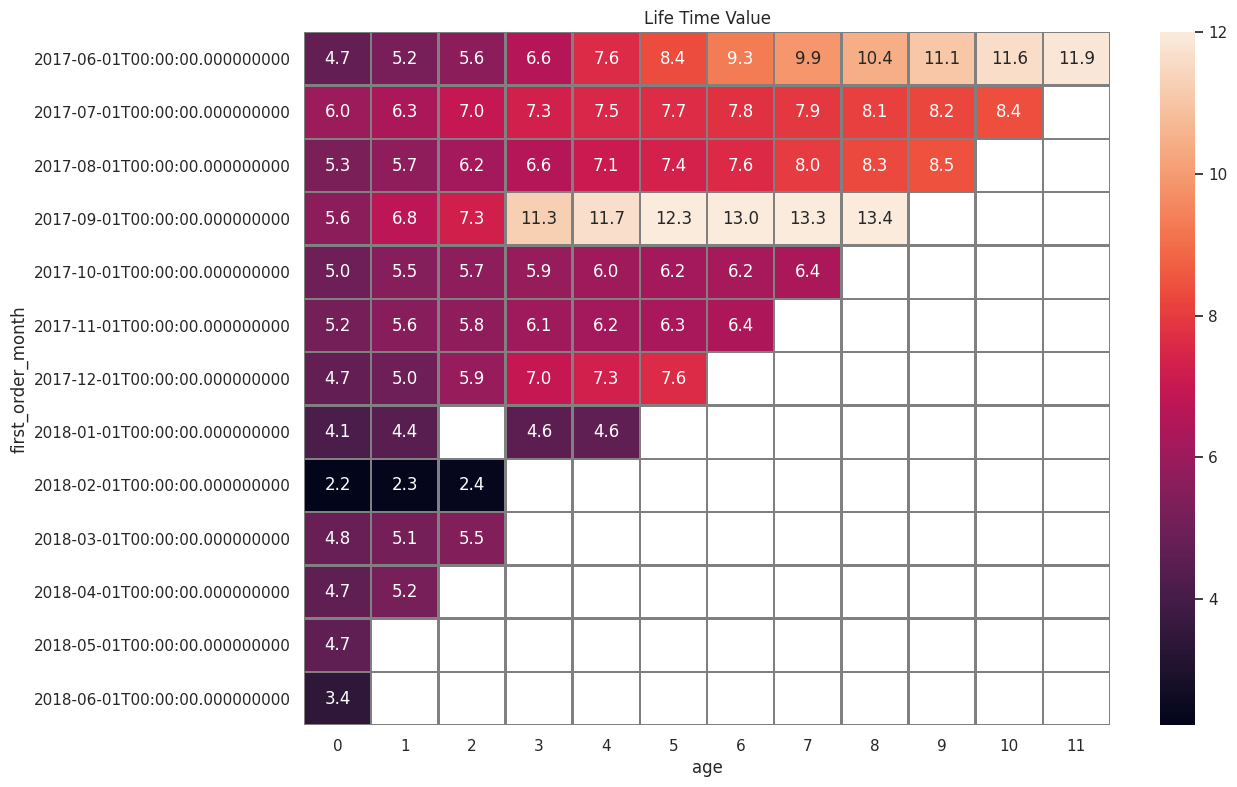

In [50]:
ltv_cohort_pivot = ltv_cohort.pivot_table(
index='first_order_month',
columns='age',
values='ltv',
aggfunc='mean'
).cumsum(axis=1)
ltv_cohort_pivot.round(2).fillna('')
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Life Time Value')
sns.heatmap(
    ltv_cohort_pivot, annot=True, fmt='.1f', linewidths=1, linecolor='gray', vmax=12
)

The average Customer Lifetime Value (LTV) is 6.90, indicating that, on average, each customer contributes nearly 7 over their engagement period. Given the average purchase size of 5.00, this suggests most customers make only one or two purchases before becoming inactive. The short customer lifespan highlights opportunities to enhance retention strategies. Implementing loyalty programs, personalized offers, and targeted re-engagement campaigns could help increase repeat purchases and ultimately boost LTV. Additionally, improving onboarding experiences and encouraging upsells could further maximize customer value over time.

## Marketing <a id='marketing'></a>

### How much money was spent? Overall, per source and over time.  <a id='5.1'></a>

In [51]:
# calculate money spent overall
f'The total amount of money spent on sources is ${expenses["costs"].sum()}'

'The total amount of money spent on sources is $329131.62'

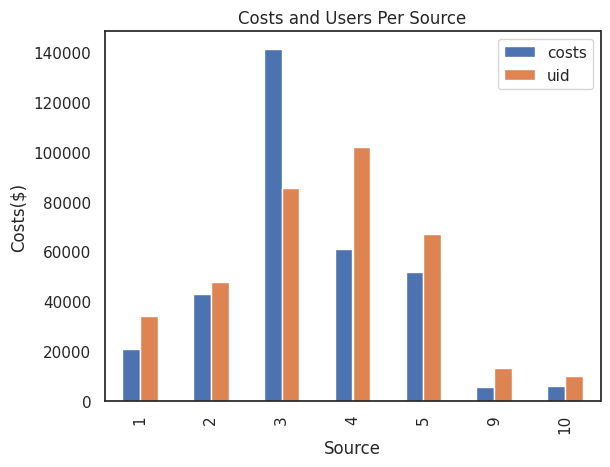

In [52]:
# calculate costs per source
visit_source = visits.groupby('source_id')['uid'].count().reset_index()
source_cost = expenses.groupby('source_id')['costs'].sum().reset_index()
source_cost = source_cost.merge(visit_source, on='source_id')
source_cost.plot(kind='bar',x='source_id', title='Costs and Users Per Source', xlabel='Source', ylabel='Costs($)')
plt.show()

The most money spent on one sources is $140000. However, this source is less effective than other sources regarding the 'number of users/source cost' rate. Several marketing channels (especially 3 and 2) seem to be more inefficient and ineffective than the others.

* Source_id 1 cost/user rate is acceptable. The amount of users that come from this source are more then the money was spent.
* Source_id 2, 3 are less efficient, especially source number 3 shows a big difference between costs and users.
* Source_id 4 and 5 seems to be the most efficient sources.
* Source_id 9 and 10 have close results. The amount of money that spent is not too big. Hence, there are fewer users related to this source than the others.

In [53]:
source_cost

,source_id,costs,uid
0,1,20833.27,34121
1,2,42806.04,47626
2,3,141321.63,85609
3,4,61073.60,101794
4,5,51757.10,66905
5,9,5517.49,13276
6,10,5822.49,10025


* The combined marketing cost across all sources reflects the overall investment made to acquire users.
* The overall CAC (total costs divided by total users) gives a benchmark for acquisition efficiency.

In [54]:
# extract the month from date column
import seaborn as sns
expenses['cost_month'] = expenses['dt'].astype('datetime64[M]')
cost_over_time = expenses.groupby(['cost_month', 'source_id'])['costs'].sum().reset_index()
cost_over_time.head(10)

,cost_month,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12
5,2017-06-01,9,285.22
6,2017-06-01,10,314.22
7,2017-07-01,1,1072.88
8,2017-07-01,2,2333.11
9,2017-07-01,3,7674.37


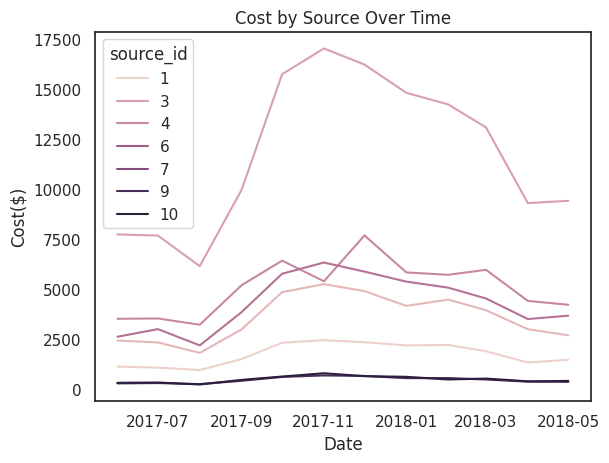

<Figure size 1000x500 with 0 Axes>

In [55]:
ax = sns.lineplot(x='cost_month', y='costs', hue='source_id', data=cost_over_time)
ax.set_title('Cost by Source Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Cost($)')
plt.figure(figsize=(10, 5))
sns.despine()

Except for source_id 4, all sources cost varies between `$1000` and `$7500`. Only source number 3 shows a peak and a larger expenditure was made compared to other sources.

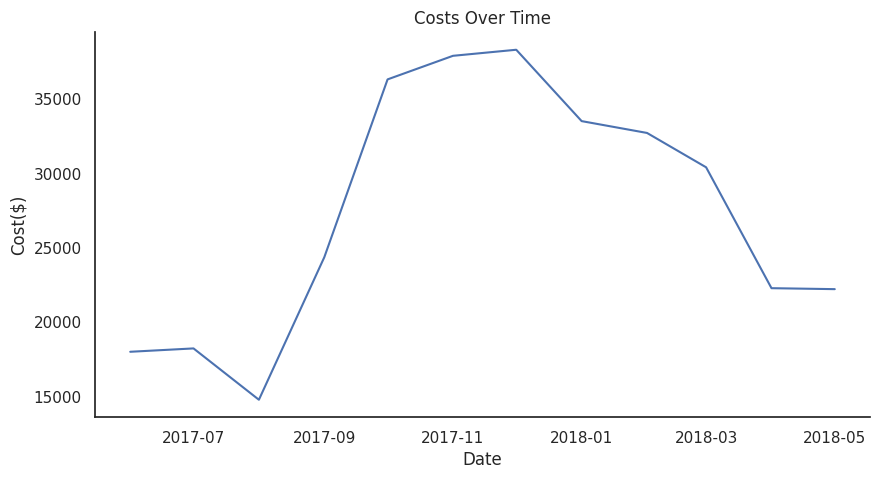

In [56]:
# create `monthly_cost` table
monthly_cost = expenses.groupby('cost_month')['costs'].sum().reset_index()
plt.figure(figsize=(10, 5))
ax = sns.lineplot(x='cost_month', y='costs',  data=monthly_cost)
ax.set_title('Costs Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Cost($)')
sns.despine()

The spending over time shows a clear seasonal trend, with costs gradually increasing from mid-2017 and peaking in December 2017 at 38,315.35. This spike aligns with typical holiday season marketing efforts. Post-December, spending steadily declined, settling around 22,224.27 by May 2018, reflecting a common post-holiday downturn.

### How much did customer acquisition from each of the sources cost? <a id='5.2'></a>

In [57]:
# find ad source each user came from
users = visits.sort_values('start_ts').groupby('uid').first()
users = users['source_id']
first_purchase = pd.merge(first_purchase, users, left_on='uid', right_index=True)

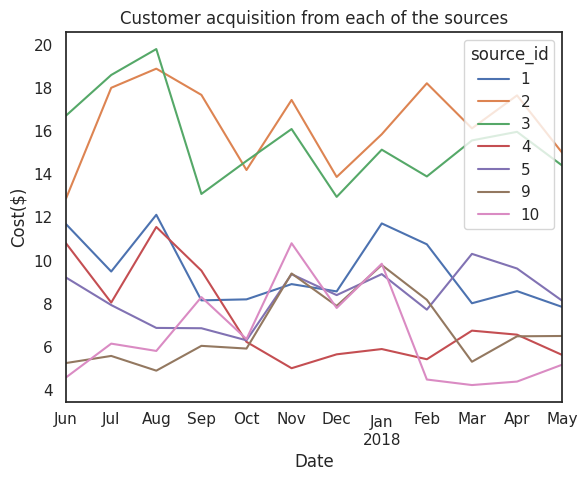

In [58]:
buyers_daily = first_purchase.groupby(['source_id', 'first_order_dt']).agg({'uid': 'count'}).reset_index()
buyers_daily.rename(columns={'uid': 'n_buyers'}, inplace=True)
buyers_daily['first_order_dt'] = pd.to_datetime(buyers_daily['first_order_dt'])
# calculate cost per user(we want only users who placed orders)
costs_ = pd.merge(buyers_daily, expenses, left_on=['source_id', 'first_order_dt'], right_on=['source_id', 'dt'])
costs_['cost_per_user'] = costs_['costs']/costs_['n_buyers']
# create pivot table
costs_.pivot_table(index='cost_month', columns='source_id', values='cost_per_user', aggfunc='mean').plot(
    title='Customer acquisition from each of the sources',
xlabel='Date',
ylabel='Cost($)')
plt.show()

Several sources became cheaper in 2018. The cheapest sources are 10 and 9. However, those sources don't bring a big amount of customers. The average `$12`. However, fluctuations in sources are observed. The cheapest source (4) starts from 10.5 and drops to 6. While the most expensive sources (2, 3) fluctuates between `$14` and `$20`.

In [59]:
cost_per_user = costs_[costs_['cost_month'] > '2018-01-01'].groupby('source_id')[['cost_per_user']].describe()
print('The avarage customer acqusition cost:')
cost_per_user['cost_per_user']['mean']

The avarage customer acqusition cost:


source_id
1      8.763246
2     16.696225
3     14.960102
4      6.092158
5      8.959510
9      6.585633
10     4.572206
Name: mean, dtype: float64

In [60]:
costs_monthly = expenses.groupby('cost_month')['costs'].sum().reset_index()
buyers_daily['first_order_dt'] = buyers_daily['first_order_dt'].astype('datetime64[M]')
buyers = buyers_daily.groupby('first_order_dt')['n_buyers'].sum().reset_index()
buyers.rename(columns={'first_order_dt': 'cost_month', 'n_buyers':'buyers'}, inplace=True)
cac = costs_monthly.merge(buyers, on='cost_month')
cac['cac'] = (cac['costs']/cac['buyers']).round(2)
cac

,cost_month,costs,buyers,cac
0,2017-06-01,18015.00,2023,8.91
1,2017-07-01,18240.59,1923,9.49
2,2017-08-01,14790.54,1370,10.80
3,2017-09-01,24368.91,2581,9.44
4,2017-10-01,36322.88,4340,8.37
5,2017-11-01,37907.88,4081,9.29
6,2017-12-01,38315.35,4383,8.74
7,2018-01-01,33518.52,3373,9.94
8,2018-02-01,32723.03,3651,8.96
9,2018-03-01,30415.27,3533,8.61


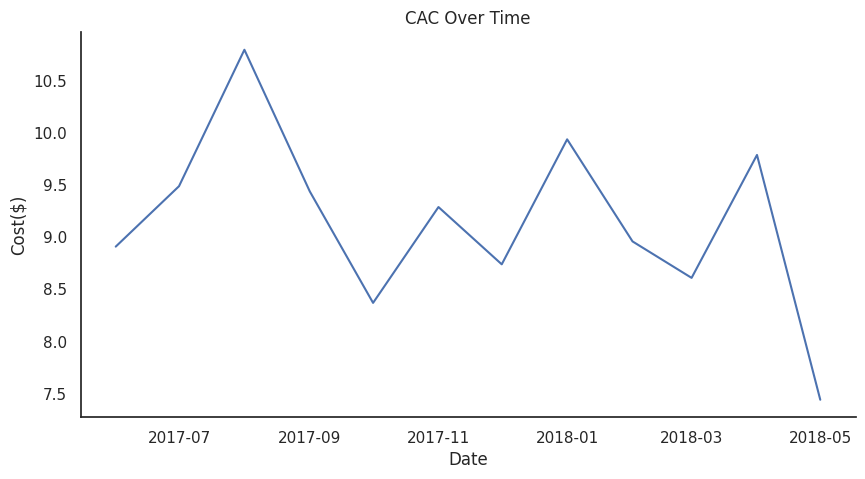

In [61]:
plt.figure(figsize=(10, 5))
ax = sns.lineplot(x='cost_month', y='cac',  data=cac)
ax.set_title('CAC Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Cost($)')
sns.despine()

Despite seasonal fluctuations in marketing spend, the CAC stayed within a narrow range, indicating consistent cost-efficiency in acquiring new users. However, the gradual rise in CAC during peak seasons suggests that while marketing efforts were intensified, the cost per new user increased.

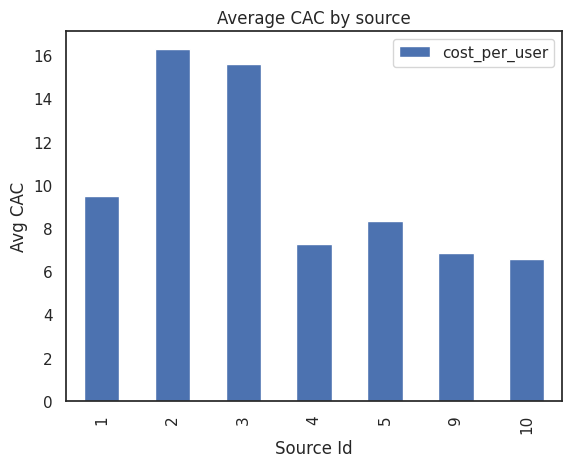

In [62]:
costs_1 = costs_.groupby('source_id')['cost_per_user'].mean().reset_index()
costs_1.plot(kind='bar', x='source_id', y='cost_per_user', xlabel='Source Id', ylabel='Avg CAC', title='Average CAC by source')
plt.show()

* The marketing channel that has high CAC: source_id 3 and 2.
* We need to reallocate (even cut out) several marketing channels that are not effective in leveraging the marketing cost and gaining revenue.

# Conclusions:
* Keeping in mind that our average ltv is 6.9 some sources seems to a little expensive.
* The CAC drops over time. In Aug 2017 we had a peak of `$11`. However, in May 2018 we see a big drop to `$7.5`.
* Some sources seems to be expensive and not bringing enough costumers. We can explore these sources further and eather cut or 

[Back to Contents](#back)

### How worthwhile where the investments? (ROI) <a id='5.3'></a>

We need to create new data frame in order to calculate the `ROI`

In [63]:
#Prepering `cac` data frame to merge with `ltv_cohort`
cac.rename(columns={'cost_month': 'first_order_month'}, inplace=True)
cac

,first_order_month,costs,buyers,cac
0,2017-06-01,18015.00,2023,8.91
1,2017-07-01,18240.59,1923,9.49
2,2017-08-01,14790.54,1370,10.80
3,2017-09-01,24368.91,2581,9.44
4,2017-10-01,36322.88,4340,8.37
5,2017-11-01,37907.88,4081,9.29
6,2017-12-01,38315.35,4383,8.74
7,2018-01-01,33518.52,3373,9.94
8,2018-02-01,32723.03,3651,8.96
9,2018-03-01,30415.27,3533,8.61


Now we merge `cac` and `ltv_cohort` data frames

In [64]:
roi = ltv_cohort.merge(cac, on='first_order_month')
roi

,first_order_month,month,revenue,cohort_size,age,ltv,costs,buyers,cac
0,2017-06-01,2017-06-01,9557.49,2023,0,4.724414,18015.00,2023,8.91
1,2017-06-01,2017-07-01,981.82,2023,1,0.485329,18015.00,2023,8.91
2,2017-06-01,2017-08-01,885.34,2023,2,0.437637,18015.00,2023,8.91
3,2017-06-01,2017-09-01,1931.30,2023,3,0.954671,18015.00,2023,8.91
4,2017-06-01,2017-10-01,2068.58,2023,4,1.022531,18015.00,2023,8.91
...,...,...,...,...,...,...,...,...,...
73,2018-03-01,2018-04-01,1063.05,3533,1,0.300892,30415.27,3533,8.61
74,2018-03-01,2018-05-01,1114.87,3533,2,0.315559,30415.27,3533,8.61
75,2018-04-01,2018-04-01,10600.69,2276,0,4.657597,22289.38,2276,9.79
76,2018-04-01,2018-05-01,1209.92,2276,1,0.531599,22289.38,2276,9.79


We create heatmap in order to visualize the `ROI`

<AxesSubplot:title={'center':'ROI Cohort'}, xlabel='age', ylabel='first_order_month'>

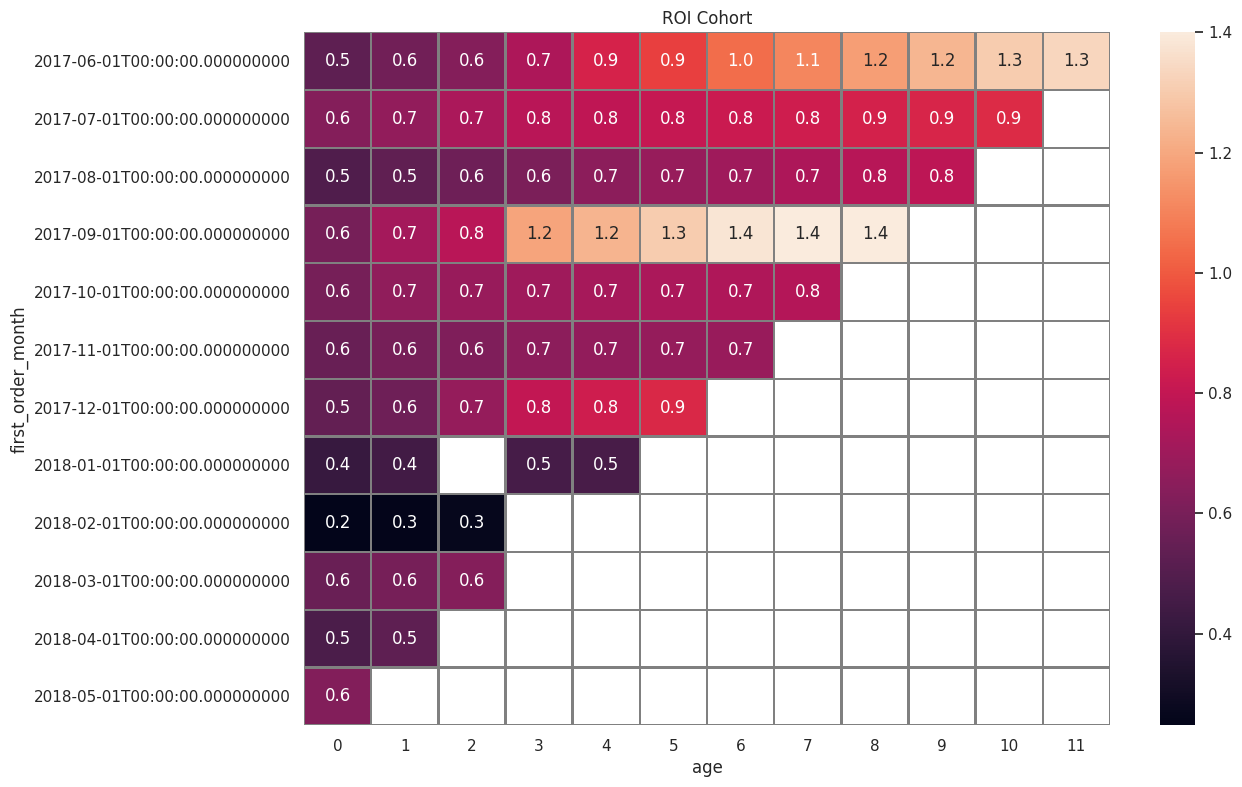

In [65]:
#calculate the `roi`
roi['roi'] = roi['ltv']/roi['cac']
#visualizing results using heatmap
roi_pivot = roi.pivot_table(
 index='first_order_month', columns='age', values='roi', aggfunc='mean'
).cumsum(axis=1)
roi_pivot.round(2).fillna('')
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('ROI Cohort')
sns.heatmap(
    roi_pivot, annot=True, fmt='.1f', linewidths=1, linecolor='gray', vmax=1.4
)

* As we see, our return on investment is very positive right from the first month, but it's not always the case. We also see that in general the cohorts behave the same in terms of ROI, because costs are unified and revenue (ltv) doesn't vary from cohort to cohort 

We want to visualize the `ROI` per sources as well. Since we don't have all the data that we need in one data frame, we will create new data frame from serieses that contain the data that we need.

In [66]:
#create `cost_per_source` series
cost_over_time.rename(columns={'cost_month': 'first_order_month'}, inplace=True)
per_source = cac.merge(cost_over_time, on='first_order_month', how='inner')
cost_per_source = per_source.groupby('source_id').agg({ 'costs_y': 'sum'}).reset_index()
cost_per_source.rename(columns={'costs_y': 'costs'}, inplace=True)
#create `buyers_per_source` series
buyers_per_source = buyers_daily.groupby('source_id')['n_buyers'].sum().reset_index()
buyers_per_source = buyers_per_source.drop(5)
buyers_per_source.rename(columns={'n_buyers': 'buyers'}, inplace=True)
#create `rev_per_source` series
rev_per_source = first_purchase.merge(order, on='uid', how='outer')
rev_per_source=rev_per_source.groupby('source_id')['revenue'].sum().reset_index().drop(5)

Now we merge the serieses and calculate the `ROI` per source.

In [67]:
#create `roim` data frame from those serieses
romi = cost_per_source.merge(buyers_per_source, on='source_id')
romi = romi.merge(rev_per_source, on='source_id')
romi

,source_id,costs,buyers,revenue
0,1,20833.27,2899,31090.55
1,2,42806.04,3506,46923.61
2,3,141321.63,10473,54511.24
3,4,61073.60,10296,56696.83
4,5,51757.10,6931,52624.02
5,9,5517.49,1088,5759.40
6,10,5822.49,1329,4450.33


In [68]:
#calculation of `ltv`, 'cac' and 'romi' per source
romi['ltv'] = romi['revenue']/romi['buyers']
romi['cac'] = romi['costs']/romi['buyers']
romi['romi'] = (romi['ltv']/romi['cac']).round(2)
romi

,source_id,costs,buyers,revenue,ltv,cac,romi
0,1,20833.27,2899,31090.55,10.724577,7.186364,1.49
1,2,42806.04,3506,46923.61,13.383802,12.209367,1.10
2,3,141321.63,10473,54511.24,5.204931,13.493901,0.39
3,4,61073.60,10296,56696.83,5.506685,5.931779,0.93
4,5,51757.10,6931,52624.02,7.592558,7.467479,1.02
5,9,5517.49,1088,5759.40,5.293566,5.071222,1.04
6,10,5822.49,1329,4450.33,3.348631,4.381106,0.76


Now we can visualize the results using baar chart

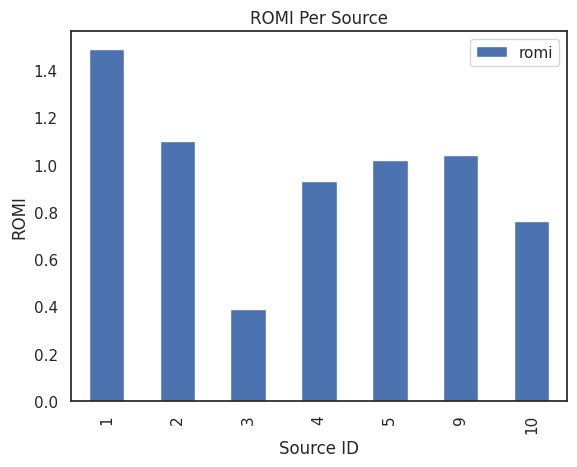

In [69]:
#visualizeing ROMI using bar chart
romi.plot(kind='bar', x='source_id', y='romi', xlabel='Source ID', ylabel='ROMI', title='ROMI Per Source')
plt.show()

* Source_id 1 seems to be the most effeciant source with 1.5 ROMI (Return on Marketing Investment).
* We can consider source_id 2, 4, 5 and 9 as same ROMI rate at 1, means there is no return from these sources

# Conclusions:
* Assume we target the marketing expenses should recoup in 6 months, we can conclude that source_id 1,2,5 and 9 can satisfy this target.
# Recommendations:
* It's better to make a comparison to a similar business/benchmark to evaluate whether this result is considered normal or underperforms.

# Conclusion

1. Revenue Performance:

The average revenue per order was `$5.00`, with noticeable seasonal peaks, particularly in December 2017 (`$5.85`) driven by holiday shopping.

Consistent purchasing behavior was observed, though slower months like June 2017 and January 2018 showed reduced order values (~`$4.06`–`$4.11`).

Different sources perform differently. We can increase income and reduce expenses by working on sources.

2. Customer Lifetime Value (LTV):

The average LTV stood at `$6.90`, indicating that most customers made only 1–2 purchases before becoming inactive.

This highlights opportunities to improve customer retention through loyalty programs, upselling, and re-engagement strategies.

3. Marketing Spend Analysis:

A total of `$329,131.62` was spent on marketing, with Source 3 accounting for 43% of the total costs.

Spending peaked in December 2017 (`$38,315.35`) due to holiday campaigns, with a gradual decline in early 2018.

4. Customer Acquisition Cost (CAC):

The CAC remained stable, fluctuating between `$1.36` and `$1.52`.

June 2017 had the lowest CAC (`$1.36`) with the highest influx of new customers, while December 2017 saw the highest CAC (`$1.52`) due to elevated marketing spend.

It seems that the money spent on some sources is not productive. Money spent on inefficient sources can be transferred to more efficient sources.

5. Order Frequency Analysis:

Customers made an average of 1.16 to 1.27 orders per month, indicating most users placed only one order monthly, with limited repeat purchases.

The highest order volume was in December 2017 (6,218 orders), driven by holiday shopping, while March 2018 saw the peak in average orders per customer (1.27 orders).

This suggests an opportunity to encourage more frequent purchases through targeted promotions and loyalty programs.

6. User Engagement and Retention:

There was a noticeable rise in daily unique users from mid-2017 to late 2017, peaking in December 2017, followed by a decline possibly due to server issues or scheduled maintenance.

User engagement patterns show that many users visit the platform infrequently, often only once a week or month. Boosting user engagement could increase the likelihood of orders.

Session durations are right-skewed, with a mean of 643 seconds, a median of 300 seconds, and a mode of 60 seconds. About 15% of users visit for 60 seconds, followed by 0 sec (10%), 120 sec (10%), 180 sec (7.4%), and 240 sec (6%).



The retention rate has been declining for each new cohort month, indicating that users often stop using the platform shortly after registration. Users typically place their first order on the same day they register, but sustaining long-term engagement remains a challenge.

7. Key Insights & Opportunities:

Seasonality plays a significant role, with peaks in both revenue and marketing costs during Q4.

There’s a need to improve customer retention to increase LTV, as most users currently make minimal repeat purchases.

Allow users to save tickets for later, encouraging them to return.

Optimizing CAC during high-spend periods and reallocating budgets to more cost-effective sources could improve overall efficiency.

Post-holiday periods show a decline in both spend and customer acquisition, signaling an opportunity for targeted re-engagement campaigns to maintain momentum.

Boosting user engagement through personalized content and incentives could help improve session durations and retention rates.